In [1]:
import numpy as numpy


## a)Saturation pressure:


## a.1)Ethanol

In [2]:
#gas constant
R = 8.3144598 #J.mol^−1.K^−1

In [3]:
#Pure component critical point of ethanol
# Tc (K)
Tc = 513.9 #K

# Pc (bar)
Pc = 61.5*(10**5) #Pa

# correlation

w = 0.635

In [4]:
#State equation parameters

T = numpy.linspace(200,Tc,300)  #K
omega=0.086640
b = (omega*R*Tc)/Pc
#print(b)








In [5]:
def a(T):
    return (R*R*Tc*Tc*0.427480/Pc)*(1+(0.480+1.574*w-0.176*w**2)*(1-(numpy.sqrt(T/Tc))))**2 #definiçaõ de função



In [6]:
def calcV(P,T):
    c1=P
    c2=-R*T
    c3=-b*R*T-P*b*b+a(T)
    c4=-a(T)*b
    V=numpy.roots([c1,c2,c3,c4])
    Vl = min(V)
    Vv = max(V)
    return (Vl,Vv)
print(calcV(100000,373))


(7.8345110651119353e-05, 0.030467186543891672)


In [7]:

def phiv(P,T):
    c1=P
    c2=-R*T
    c3=-b*R*T-P*b*b+a(T)
    c4=-a(T)*b
    V=numpy.roots([c1,c2,c3,c4])
    Vv= max(V)
    return numpy.exp(((P*Vv)/(R*T))-1-numpy.log(((P*Vv)/(R*T))-(b*P)/(R*T))- (a(T)/(b*R*T))*numpy.log((((P*Vv)/(R*T))+ (b*P)/(R*T))/((P*Vv)/(R*T)))),Vv

def phil(P,T):
    c1=P
    c2=-R*T
    c3=-b*R*T-P*b*b+a(T)
    c4=-a(T)*b
    V=numpy.roots([c1,c2,c3,c4])
    Vl= min (V)
   
    return numpy.exp(((P*Vl)/(R*T))-1-numpy.log(((P*Vl)/(R*T))-(b*P)/(R*T))- (a(T)/(b*R*T))*numpy.log((((P*Vl)/(R*T))+ (b*P)/(R*T))/((P*Vl)/(R*T)))),Vl

print(phiv(100000,343))
print(phil(100000,343))


(0.977450729103018, 0.027861312333917556)
(0.72203859480867627, 7.4416933314586098e-05)


In [8]:
def H_res(T,P,V):

    Tr=T/Tc
    dev=(402374603786943180544511778531*((2253215889523281*Tr**(1/2))/2251799813685248 - 4505015703208529/2251799813685248))/(316912650057057350374175801344*Tr**(1/2))
    Z=(P*V)/(R*T);
    q=a(T)/(b*R*T);
    beta=b*P/(R*T);
    I=numpy.log((Z+beta)/Z);

    return Z-1+ (dev-1)*q*I

In [9]:
def S_res(T,P,V):
    Tr=T/Tc
    dev=(402374603786943180544511778531*((2253215889523281*Tr**(1/2))/2251799813685248 - 4505015703208529/2251799813685248))/(316912650057057350374175801344*Tr**(1/2))
    Z=(P*V)/(R*T);
    q=a(T)/(b*R*T);
    beta=b*P/(R*T);
    I=numpy.log((Z+beta)/Z)
   
    return numpy.log(Z-beta)+ dev*q*I

In [10]:
def P_sat(T,P_iguess):

    RES=1
    TOL=1e-9
    MAX=1000
    i=0
    P=P_iguess
    while(RES>TOL and i<MAX): 
        
        valor_phi_L, Vol_L = phil(P,T)
        valor_phi_V, Vol_V = phiv(P,T)
        
        P=P*(valor_phi_L/valor_phi_V)
        RES=abs((valor_phi_L/valor_phi_V)-1.)
        i=i+1
        #print(phil(P,T))
        #print(phiv(P,T))
        #print(P_sat)
        
    HRES_L=H_res(T,P,Vol_L)
    HRES_V=H_res(T,P,Vol_V)
    SRES_L=S_res(T,P,Vol_L)
    SRES_V=S_res(T,P,Vol_V)  
        
        
        
    return P, Vol_L, Vol_V, HRES_L, HRES_V,SRES_L,SRES_V

P_loop=(100000)
print(P_sat(303,P_loop))
valP = numpy.zeros(300)
val_L = numpy.zeros(300)
val_V = numpy.zeros(300)
HR_L= numpy.zeros(300)
HR_V = numpy.zeros(300)
SR_L= numpy.zeros(300)
SR_V= numpy.zeros(300)
for j in range(300): #criação de um loop
    T_=T[j]
    valP[j], val_L[j],val_V[j],HR_L[j],HR_V[j],SR_L[j],SR_V[j]= P_sat(T_,P_loop)
    
    
#print(val)
print(P_sat(303,P_loop))

    




                

(10125.207513454221, 7.0605996635191156e-05, 0.24798348733313016, -28.596823917150527, -0.014196635534752533, -28.593495907550746, -0.010868625934992875)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


(10125.207513454221, 7.0605996635191156e-05, 0.24798348733313016, -28.596823917150527, -0.014196635534752533, -28.593495907550746, -0.010868625934992875)


In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

## Saturation Pressure by Antoine:

In [13]:
A1=8.20417
B1=1642.89
C1=-42.85
f=133.32

def P1_Sat(T):
    P1=(10**(A1 - (B1/(C1+T))))*f
    return P1
print(P1_Sat(303))
print(P1_Sat(295))


A2=7.68117
B2=1332.04
C2=-73.95


def P2_Sat(T):
    P2 = (10**(A2 - (B2/(C2+T))))*f
    return P2

print(P2_Sat(523))

T1=numpy.linspace(270,353,100)
val1 = numpy.zeros(100)

for i in range(100):
        T1_=T1[i]
        val1[i]=P1_Sat(T1_)
        #print(T1,val1)
   
 
T2=numpy.linspace(354,Tc,100)

val2 = numpy.zeros(100)  

for i in range(100):
    T2_=T2[i]
    val2[i]=P2_Sat(T2_)
    

    

10325.259531553695
6509.368120673797
6913757.126756909


## Saturation Pressure by:

* SRK equation 
* Antoine equation 
* Experimental values



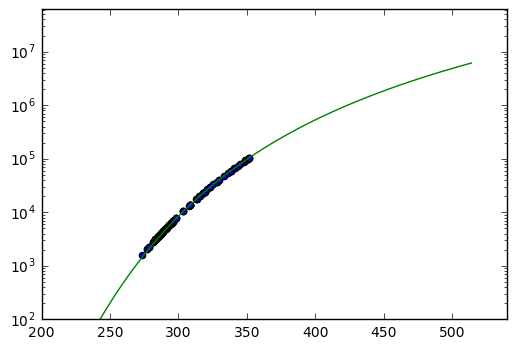

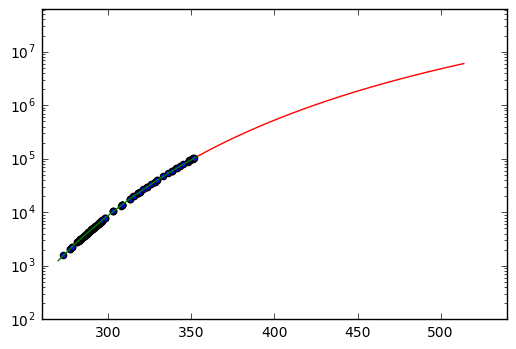

In [15]:
dadosexp = numpy.loadtxt('exp_data_vapor_pressure_ethanol.txt', dtype='float', comments='#', converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
T_exp = dadosexp[:,0]
P_exp = dadosexp[:,1]*1000

plt.figure(1)
plt.semilogy(1)
plt.scatter(T_exp,P_exp)
plt.plot(T,valP)
plt.xlim([200,Tc*1.05])
plt.ylim([100,Pc*10])
plt.show()
plt.figure(2)
plt.semilogy(1)
plt.scatter(T_exp,P_exp)
plt.xlim([260,Tc*1.05])
plt.ylim([100,Pc*10])
plt.plot(T1,val1)
plt.plot(T2,val2)
plt.show()

## Thermodynamics properties

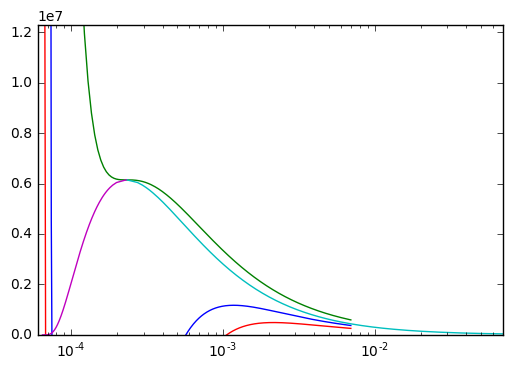

In [26]:
def SRK(V,T):
    
    P= ((R*T)/(V-b)) - (a(T)/(V*(V+b)))
    #print(b)
    #print(a(T),R)
    return P
 
Vc=R*Tc/Pc
 


V=numpy.linspace(b*1.0001,10*Vc,1000)
plt.figure(1)
plt.semilogx(V,SRK(V,343))
#print(SRK(V,343))

plt.semilogx(V,SRK(V,Tc))


plt.semilogx(V,SRK(V,Tc/2))

plt.xlim(b,100*Vc)
plt.ylim(0*Pc,2*Pc)

plt.semilogx(val_V, valP)
plt.semilogx(val_L, valP)


plt.show()    




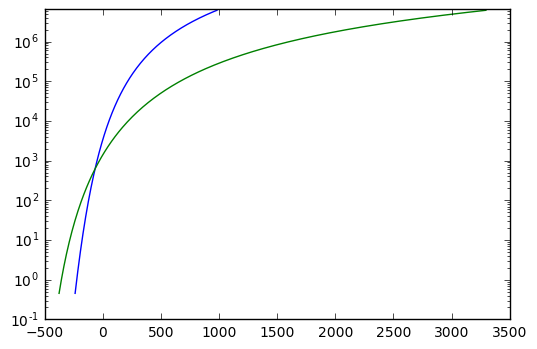

In [25]:
#Enthalpy for ideal gas
def Hid_l(T):
    a0=0.81763;
    a1=2.6793*0.001;
    a2=1.3888*10**-5;
    Tref=273.15
    int_cp_l=a0*(T-Tref)+a1*(T*T-Tref*Tref)*0.5+a2*(T*T*T-Tref*Tref*Tref)*(1/3);
    return int_cp_l

def Hid_v(T):
    a3=0.29255;
    a4=1.2271*0.001;
    a5=8.0938*10**-5;
    Tref=273.15
    int_cp_l=a3*(T-Tref)+a4*(T*T-Tref*Tref)*0.5+a5*(T*T*T-Tref*Tref*Tref)*(1/3);
    return int_cp_l

#print(Hid(T))
#Hl=numpy.zeros(300)
Hl=Hid_l(T)+HR_L
Hv=Hid_v(T)+HR_V
#print(Hl)
#print(valP)

plt.figure(1)
plt.semilogy(Hl,valP)
#plt.plot(Hv,valP)
plt.semilogy(Hv,valP)
#plt.xlim(-500,0)
plt.ylim(0.1,1.05*Pc)
plt.show() 

In [ ]:
#Entropy for ideal gas
def Sid_v(P,T):
    Pref=1*10**5
    a3=0.29255;
    a4=1.2271*0.001;
    a5=8.0938*10**-5;
    Tref=273.15
    return R*(a4/4*(T**4-Tref**4)+a3/3*(T**3-Tref**3)+a2/2*(T**2-Tref**2)+a1*(T-Tref)+a0*numpy.log(T/Tref))-R*numpy.log(P/Pref)

def Sid_l(P,T):
    Pref=1*10**5
    a0=0.81763;
    a1=2.6793*0.001;
    a2=1.3888*10**-5;
  
    Tref=273.15
    return R*(a4/4*(T**4-Tref**4)+a3/3*(T**3-Tref**3)+a2/2*(T**2-Tref**2)+a1*(T-Tref)+a0*numpy.log(T/Tref))-R*numpy.log(P/Pref)
    
Sl=SR_L+Sid_l(valP,T)
Sv=SR_V+Sid_v(valP,T)
#print(Sl)